In [ ]:
#@title #Modules
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GRU, LSTM
from keras.layers import Activation, TimeDistributed, LSTM, BatchNormalization
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam
from keras.models import Sequential, Model


In [ ]:
#@title #Engines
%%writefile engines.py
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GRU, LSTM
from keras.layers import Activation, TimeDistributed, LSTM, BatchNormalization
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam
from keras.models import Sequential, Model
#from tensorflow.keras.optimizers import SGD, Adam, RMSprop

size = (224, 224,3)

def create_cnn_lstm(Image_shape=size, block1=True, block2=True, block3=True,
                 block4=True, block5=True, lstm=True, regularizer=keras.regularizers.l2(0.0001),
                 Dropout_ratio=0.15):

    # * Create the model
    model = keras.Sequential()

    # * configure the inputshape
    model.add(keras.Input(shape=Image_shape))

    # * Add the first block
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1, kernel_regularizer=regularizer))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # * Add the second block
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2, kernel_regularizer=regularizer))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # * Add the third block
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3, kernel_regularizer=regularizer))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # * Add the fourth block
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # * Add the fifth block
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    
    model.add((MaxPooling2D(pool_size=(2, 2))))
    model.add(BatchNormalization())

    # * Reshape the output of the last layer to be used in the LSTM layer
    model.add(keras.layers.Reshape((7*7, 512)))
    model.add(LSTM(512, activation='relu', trainable=lstm, return_sequences=True))
    model.add(BatchNormalization())

    #* flatten + Fc layer
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(Dropout_ratio))
    model.add(BatchNormalization())
    
    # * Output layer
    #model.add(Dense(3, activation='linear'))
    model.add(Dense(3, activation='sigmoid'))
    #print('Done')
    return model


#* compile function
def cnn_lstm_compile(model, loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=0.0001, decay=1e-6)):
    model.compile(
        #loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        loss=loss,
        optimizer=optimizer,
        metrics=['accuracy']
    )
def cnn_compile(model):
  model.compile(loss = "categorical_crossentropy", optimizer = Adam(lr=0.0001, decay=1e-6),metrics = ["accuracy"])


  

def create_cnn_model():
    model = Sequential()

    model.add(Conv2D(input_shape=(224, 224,3),filters=64, kernel_size=(5, 5),  padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=64, kernel_size=(5, 5),  padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=64, kernel_size=(5, 5),  padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=64, kernel_size=(5, 5),  padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(MaxPool2D(pool_size=(5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(5, 5), padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), padding="same",kernel_regularizer=keras.regularizers.l2(0.0001), activation='LeakyReLU'))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), padding="same",kernel_regularizer=keras.regularizers.l2(0.0001),activation='LeakyReLU'))
    model.add(MaxPool2D(pool_size=(5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(512,activation = "LeakyReLU"))
    model.add(Dropout(0.3))

    model.add(Dense(512,activation = "LeakyReLU"))
    model.add(Dropout(0.3))

    model.add(Dense(512,activation = "LeakyReLU"))
    model.add(Dropout(0.3))

    model.add(Dense(3,activation = "softmax"))

    return model

Overwriting engines.py


In [ ]:
#@title #Uploade your Kaggle API Token - only on train

! pip install -q kaggle 
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download andrewnaaem/augmented-xray-dataset
!unzip -q augmented-xray-dataset.zip -d ./data/
from google.colab import output
output.clear()

In [ ]:
#@title # Connect to Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title # Create Dataset dataframe - Only on train
from engines import *
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

directory = '/content/data/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'
#directory = '/kaggle/input/augmented-xray-dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'
#directory = r'C:/Users/DELL/OneDrive/Desktop/Graduation project/Covid19-Lstm-CNN/Collected_dataset_paper'

data_df = pd.DataFrame(columns=['directory', 'class'])

for filename in os.listdir(directory):
    if not filename == 'metadata.csv':
        for img in os.listdir(directory+"/"+filename):
            data_df = data_df.append({'directory':directory+"/"+filename+"/"+img, 'class':filename}, ignore_index = True)

In [ ]:
#@title #Create Data Generators - Only on train

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

#* Defining parameters
batch_size = 24
size = (224,224,3)
img_width = img_hight = size[0]
random_state = 7
#Class_mapping = {2 : 'pneumonia', 1 : 'covid', 0 : 'normal'}
#classes = list(Class_mapping.values())
classes = list(data_df['class'].unique())
#* Creating data generators
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Paper_train_split = pd.read_csv('train_split.csv')
# Paper_train_split.set_index('Unnamed: 0', inplace=True, drop=True)
# Paper_train_split['directory'] = Paper_train_split['directory'].apply(lambda x: directory + '/' + x.split('/')[-2] + '/' + x.split('/')[-1])

# Paper_test_split = pd.read_csv('test_split.csv')
# Paper_test_split.set_index('Unnamed: 0', inplace=True, drop=True)
# Paper_test_split['directory'] = Paper_test_split['directory'].apply(lambda x: directory + '/' + x.split('/')[-2] + '/' + x.split('/')[-1])


from sklearn.model_selection import train_test_split
Paper_train_split , Paper_test_split , _ , _ = train_test_split(data_df, data_df['class'], train_size=0.8, random_state=7, stratify=data_df['class'])


paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42)

Unshuffled_paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42, shuffle = False)

#Validation Data Generator
Unshuffled_paper_val_data = data_gen.flow_from_dataframe(Paper_test_split, x_col='directory', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42,shuffle = False)



Found 3660 non-validated image filenames belonging to 3 classes.
Found 3660 non-validated image filenames belonging to 3 classes.
Found 915 non-validated image filenames belonging to 3 classes.


In [ ]:
#@title #training CNN model - already done
import os
if not os.path.exists('/content/drive/MyDrive/Graduation-project/Models/CNN_best_model'):
#callbacks 
  checkpoint =tf.keras.callbacks.ModelCheckpoint(filepath='CNN-model.h5', 
                                monitor='val_accuracy',
                                mode='max',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True)

  earlystop= tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                            min_delta = 0, 
                            patience = 30,
                            verbose = 1,
                            restore_best_weights = True)
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                              patience=6, 
                                              verbose=1, 
                                              factor=0.2, 
                                              min_lr=0.00000001)
  cnn_model = create_cnn_model()
  cnn_compile(cnn_model)

  history= cnn_model.fit(
        paper_train_data, 
        validation_data= Unshuffled_paper_val_data, 
        epochs=46, 
        callbacks=[earlystop,checkpoint, reduce_lr])
else :
    print('model already trained')

model already trained


In [ ]:
#@title Saving model - skip if models are trained already
#cnn_model.load_weights('/content/CNN-model.h5')
#cnn_model.save('/content/drive/MyDrive/Graduation-project/Models/CNN_best_model')
#cnn_model.save_weights('/content/drive/MyDrive/Graduation-project/Models/CNN_best_weights/weights.h')
#cnn_model.load_weights('/content/drive/MyDrive/Graduation-project/Models/CNN_best_weights/weights.h')


In [ ]:
#@title #training CNN-LSTM model - Already done
import os
if not os.path.exists('/content/drive/MyDrive/Graduation-project/Models/CNN-LSTM_best_model'):
  print('run')
#callbacks 
  checkpoint =tf.keras.callbacks.ModelCheckpoint(filepath='CNN_LSTM-model.h5', 
                                monitor='val_accuracy',
                                mode='max',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True)

  earlystop= tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                            min_delta = 0, 
                            patience = 30,
                            verbose = 1,
                            restore_best_weights = True)
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                              patience=6, 
                                              verbose=1, 
                                              factor=0.2, 
                                              min_lr=0.00000001)
  cnn_lstm_model = create_cnn_lstm()
  cnn_lstm_compile(cnn_lstm_model)

  history= cnn_lstm_model.fit(
        paper_train_data, 
        validation_data= Unshuffled_paper_val_data, 
        epochs=46, 
        callbacks=[earlystop,checkpoint, reduce_lr])
else :
  print('model already trained')

model already trained


In [ ]:
#@title Skip if model is trained already
# cnn_lstm_model.load_weights('/content/CNN_LSTM-model.h5')
# cnn_lstm_model.save('/content/drive/MyDrive/Graduation-project/Models/CNN-LSTM_best_model')
# cnn_lstm_model.save_weights('/content/drive/MyDrive/Graduation-project/Models/CNN-LSTM_best_weights/weights.h')

In [ ]:
#@title #Load model
Choose_Model = "CNN-LSTM" #@param ["CNN", "CNN-LSTM"] {type:"string"}

if Choose_Model == "CNN":
  path = '/content/drive/MyDrive/Graduation-project/Models/CNN_best_model'
else:
  path = '/content/drive/MyDrive/Graduation-project/Models/CNN-LSTM_best_model'

loaded_model = tf.keras.models.load_model(path)

In [ ]:
#@title # Uploade Image for prediction
from google.colab import files
uploaded_img = files.upload()

Saving COVID19(488).jpg to COVID19(488).jpg


1/1 [==============================] - 0s 324ms/step


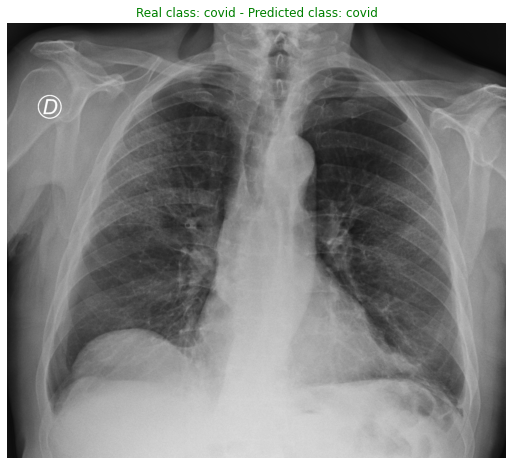

In [ ]:
#@title # Predict on uploaded Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


img_path = list(uploaded_img.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_normalized = img_array/255.0
img_batch = np.expand_dims(img_normalized, axis=0)
class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}
#paper_train_data.class_indices
#class_dict = paper_train_data.class_indices
class_dict = {value:key for key , value in class_dict.items()}
prediction = loaded_model.predict(img_batch)
real_class = 'covid' #@param ["covid", "normal", 'pneumonia' ]{type:"string"}
#class_dict[prediction.argmax()] , real_class, prediction
predicted_class = class_dict[prediction.argmax()]
wrong = {"text.color" : "red"}
right = {"text.color" : "green"}

if real_class == predicted_class:
    plt.rcParams.update(right)
else:
    plt.rcParams.update(wrong)
plt.figure(figsize=(12,8))
plt.imshow(Image.open(img_path), 'gray')
plt.axis('off')
plt.title('Real class: {} - Predicted class: {}'.format(real_class, predicted_class))
plt.xlabel('prediction')
plt.show()

In [ ]:
uploaded_imgs = files.upload()

In [ ]:
imgs_path = list(uploaded_imgs.keys())

In [ ]:
cnn_path = '/content/drive/MyDrive/Graduation-project/Models/CNN_best_model'
cnn_lstm_path = '/content/drive/MyDrive/Graduation-project/Models/CNN-LSTM_best_model'
cnn_model = tf.keras.models.load_model(cnn_path)
cnn_lstm_model = tf.keras.models.load_model(cnn_lstm_path)



In [ ]:
class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}

predicted_classes = class_dict.keys()
predicted_classes

dict_keys(['covid', 'normal', 'pneumonia'])

In [ ]:
class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}
predicted_classes = list(class_dict.keys())

predicted_CNN = list(model1.predict(img_batch))
predicted_CNN_LSTM = list(model2.predict(img_batch))
print(predicted_CNN)
print(predicted_CNN_LSTM)
predicted_CNN = list(model1.predict(img_batch))
predicted_CNN_LSTM = list(model2.predict(img_batch))

NameError: ignored

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

img_path = list(uploaded_img.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_normalized = img_array/255.0
img_batch = np.expand_dims(img_normalized, axis=0)
class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}
#paper_train_data.class_indices
#class_dict = paper_train_data.class_indices
class_dict = {value:key for key , value in class_dict.items()}
prediction = loaded_model.predict(img_batch)
#real_class = 'pneumonia' #@param ["covid", "normal", 'pneumonia' ]{type:"string"}
real_class = 'pneumonia'
#class_dict[prediction.argmax()] , real_class, prediction
#predicted_class = class_dict[prediction.argmax()]
# wrong = {"text.color" : "red"}
# right = {"text.color" : "green"}



def plot_pred_dist(real_class = real_class , model1 = cnn_model ,model2 = cnn_lstm_model, test_X_gray = img_path):
    
    fig = make_subplots(rows=2, cols=2, column_widths=[0.5, 0.5],                         
                        specs=[[{'rowspan': 2}, {}], [None, {}]])
    
    class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}
    predicted_classes = list(class_dict.keys())

    predicted_CNN = model1.predict(img_batch)[0]
    predicted_CNN_LSTM = model2.predict(img_batch)[0]
    print(predicted_CNN)
    print(predicted_CNN_LSTM)

    CNN_Trace = go.Bar(x=predicted_classes, y=predicted_CNN, name='CNN Prediction proba')
    CNN_LSTM_Trace = go.Bar(x=predicted_classes, y=predicted_CNN_LSTM, name='CNN-LSTM prediction proba')

    trace1_img = go.Image(z = img_array)
    fig.append_trace(trace1_img, row=1, col=1 )
    fig.append_trace(CNN_Trace, row=1, col=2 )
    fig.append_trace(CNN_LSTM_Trace, row=2, col=2 )

    
    #fig.update_xaxes(dtick=1, row=1, col=2)
    #fig.update_xaxes(dtick=1, row=2, col=2)
    fig.update_yaxes(title_text='predictions', row=1, col=2)
    #fig.update_xaxes(title_text=f'predicted Num is {predicted_MLP.index(max(predicted_MLP))}', row=1, col=1)
    #fig.update_layout(title_text='MLP Model Prediction distribution', title_x=0.25)
    

    fig.append_trace(trace1_img, row=1, col=1 )
    #fig.update_xaxes(dtick=1, row=1, col=2)
    fig.update_yaxes(title_text='Predictions', row=2, col=2)
    #fig.update_xaxes(title_text=f'MLP Predicts [{predicted_MLP.index(max(predicted_MLP))}] -- CNN Predicts [{predicted_CNN.index(max(predicted_CNN))}] ', row=1, col=1 )
    fig.update_layout(title_text='CNN vs CNN LSTM', title_x=0.6)
    fig.show()
    
plot_pred_dist()


1/1 [==============================] - 0s 46ms/step
[0.0708747  0.79296947 0.13615589]
[0.49466097 0.6015418  0.13456683]


In [ ]:
class_dict = {'covid': 0, 'normal': 1, 'pneumonia': 2}
#paper_train_data.class_indices
#class_dict = paper_train_data.class_indices
class_dict = {value:key for key , value in class_dict.items()}
for path in imgs_path:
  img = image.load_img(path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_normalized = img_array/255.0
  img_batch = np.expand_dims(img_normalized, axis=0)

  prediction = loaded_model.predict(img_batch)
